## Part 1. Fandango ratings analysis

### Uploading data

In [306]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns

sns.set_style("darkgrid")

warnings.filterwarnings('ignore')

In [307]:
fandango = pd.read_csv("data/fandango_scrape.csv")
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [308]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    510 non-null    object 
 1   STARS   510 non-null    float64
 2   RATING  510 non-null    float64
 3   VOTES   510 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 16.1+ KB


### Exploring the relationship between data

In [309]:
fandango.corr(numeric_only=True)

,STARS,RATING,VOTES
STARS,1.000000,0.994870,0.165774
RATING,0.994870,1.000000,0.165147
VOTES,0.165774,0.165147,1.000000


As you can see, there is a strong correlation between the rating and the number of stars, as they determine the same parameter. However, due to the way ratings are displayed as stars on HTML pages, the true ratings may differ from the ratings that are displayed on the site. A detailed study of these two parameters will be useful.

In [310]:
fandango.describe()

,STARS,RATING,VOTES
count,510.000000,510.000000,510.000000
mean,3.532353,3.351765,1134.364706
std,1.585616,1.512628,3809.952176
min,0.000000,0.000000,0.000000
25%,3.500000,3.025000,2.000000
50%,4.000000,3.800000,17.500000
75%,4.500000,4.300000,183.500000
max,5.000000,5.000000,34846.000000


As you can see, the median difference between the parameters of the number of stars and the rating is 0.2, let's visualize this:

In [311]:
df1 = fandango[fandango["VOTES"] > 0]
len(fandango) - len(df1) # Number of films with no reviews

73

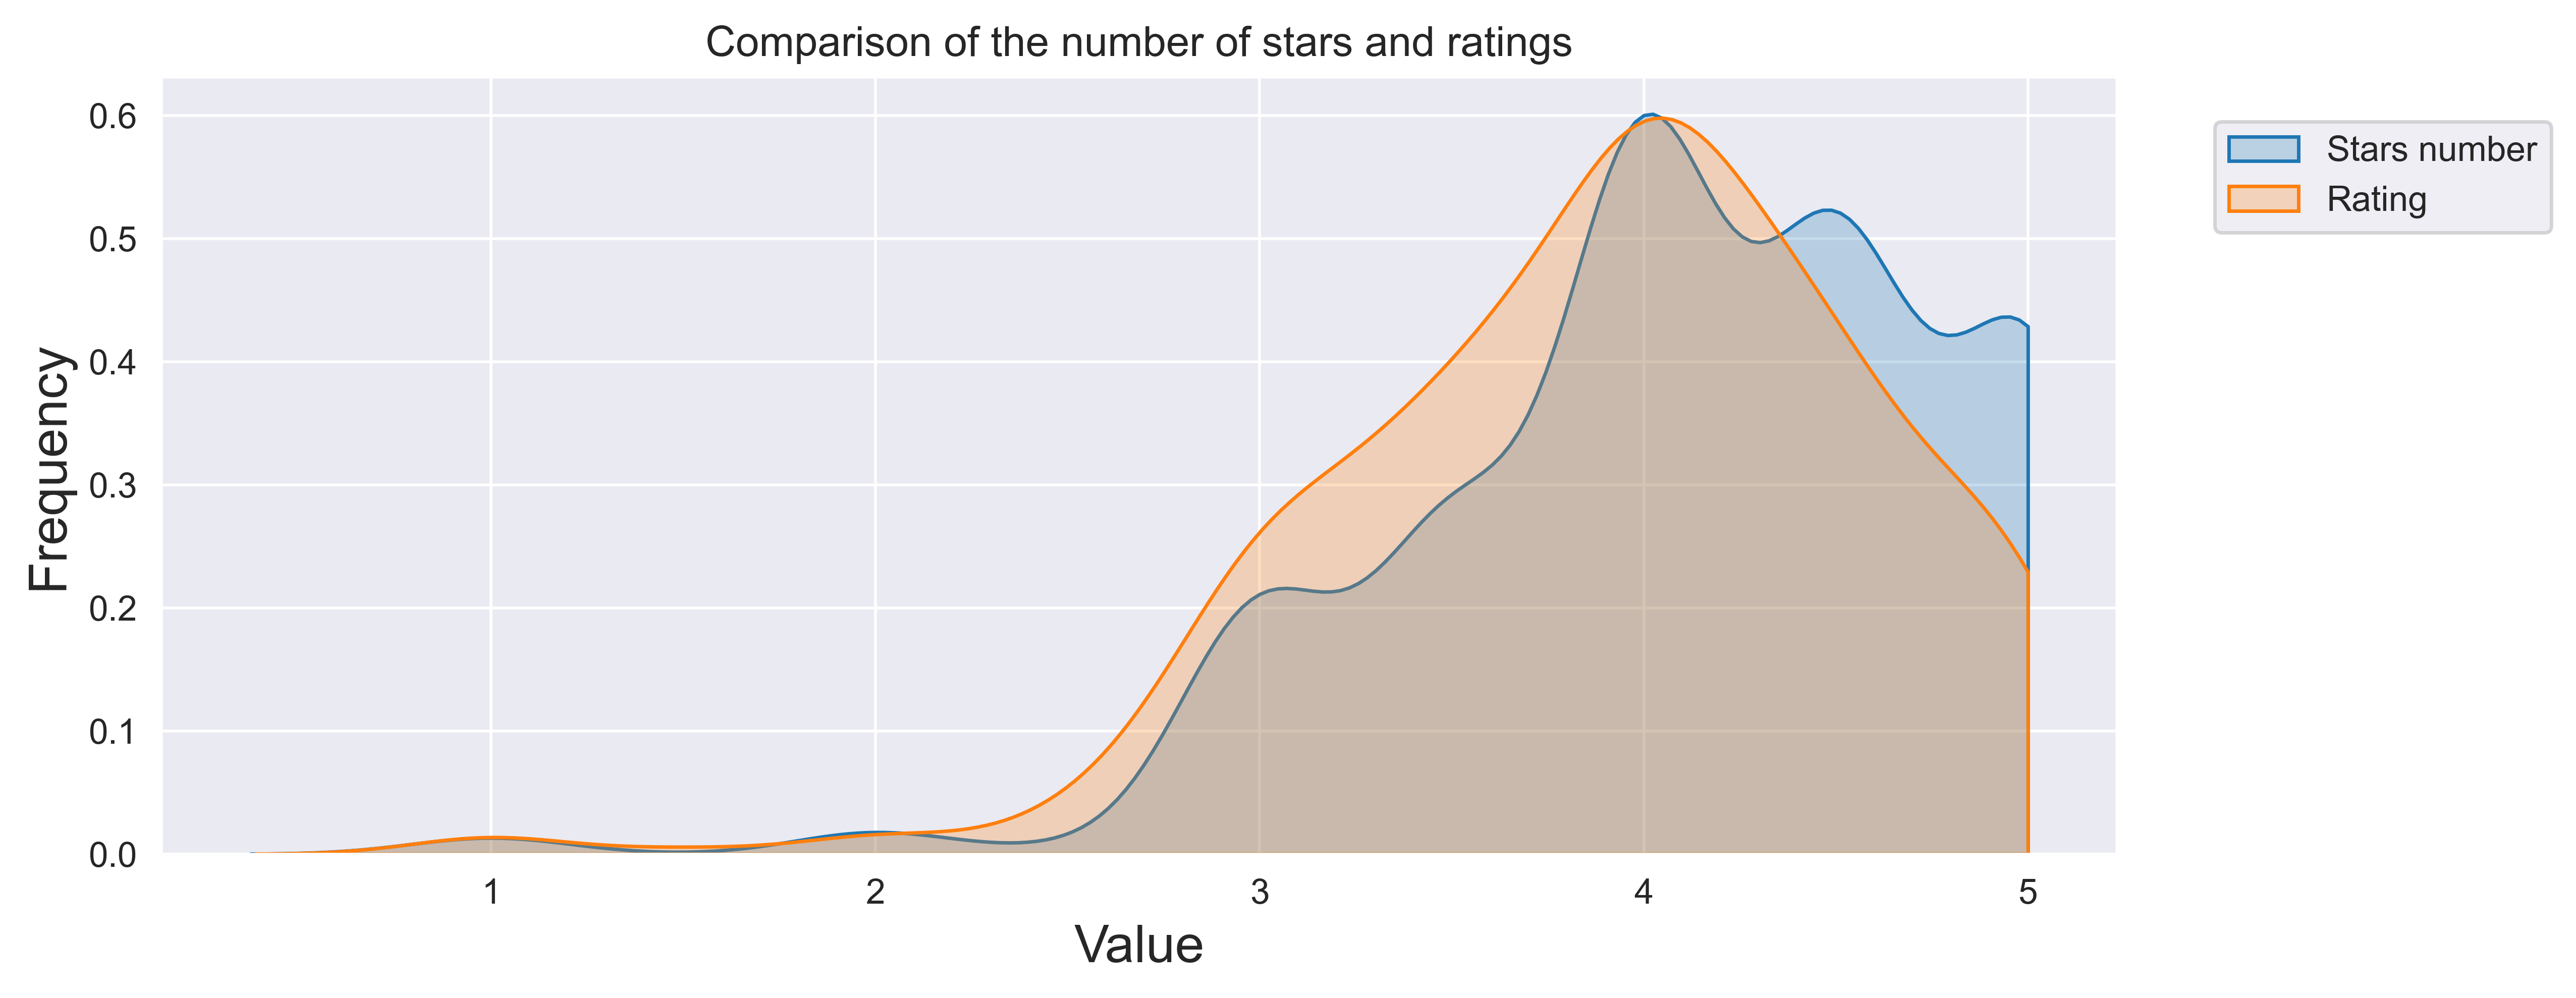

In [312]:
plt.figure(figsize=(10, 4), dpi=500)

sns.kdeplot(data=df1, x="STARS", clip=[0, 5], fill=True, label="Stars number")
sns.kdeplot(data=df1, x="RATING", clip=[0, 5], fill=True, label="Rating")

plt.xlabel("Value", size=15)
plt.ylabel("Frequency", size=15)
plt.title("Comparison of the number of stars and ratings")

plt.legend(loc=(1.05, 0.8));

Indeed, the graph showing the number of stars is shifted to the right compared to the graph showing the rating. This could be related to the rounding of values, but on average it would occur in both directions, in our case it occurs only in a big way. 

Now let's study the difference numerically:

In [313]:
df1["DIFF"] = (df1["STARS"] - df1["RATING"]).round(2)

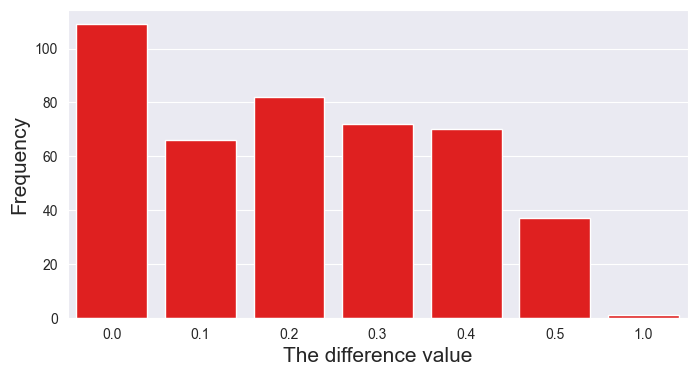

In [314]:
plt.figure(figsize=(8, 4))

sns.countplot(data=df1, x="DIFF", color="r")

plt.xlabel("The difference value", size=15)
plt.ylabel("Frequency", size=15);

In [315]:
# The movie with the largest difference in the number of stars and rating
df1.iloc[df1.idxmax()["DIFF"]]

FILM      Turbo Kid (2015)
STARS                  5.0
RATING                 4.0
VOTES                    2
DIFF                   1.0
Name: 381, dtype: object

## Part 2. Analysis of Fandango ratings in comparison with ratings of other companies

 ### Uploading data

In [316]:
all_sites = pd.read_csv("data/fandango_score_comparison.csv")
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [317]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Fandango_Stars              146 non-null    float64
 7   Fandango_Ratingvalue        146 non-null    float64
 8   RT_norm                     146 non-null    float64
 9   RT_user_norm                146 non-null    float64
 10  Metacritic_norm             146 non-null    float64
 11  Metacritic_user_nom         146 non-null    float64
 12  IMDB_norm                   146 non-null    float64
 13  RT_norm_round               146 non

In [318]:
df2 = all_sites[["FILM", "RottenTomatoes", "RottenTomatoes_User", "Metacritic", "Metacritic_User", "IMDB"]]
df2.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8
1,Cinderella (2015),85,80,67,7.5,7.1
2,Ant-Man (2015),80,90,64,8.1,7.8
3,Do You Believe? (2015),18,84,22,4.7,5.4
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1


### A short analysis of ratings from other companies

#### Rotten Tomatoes

There are two sets of ratings available: 
- `RottenTomatoes` - ratings from critics;
- `RottenTomatoes_User` - rating from users. 

Let's display the relationship of some ratings from others:

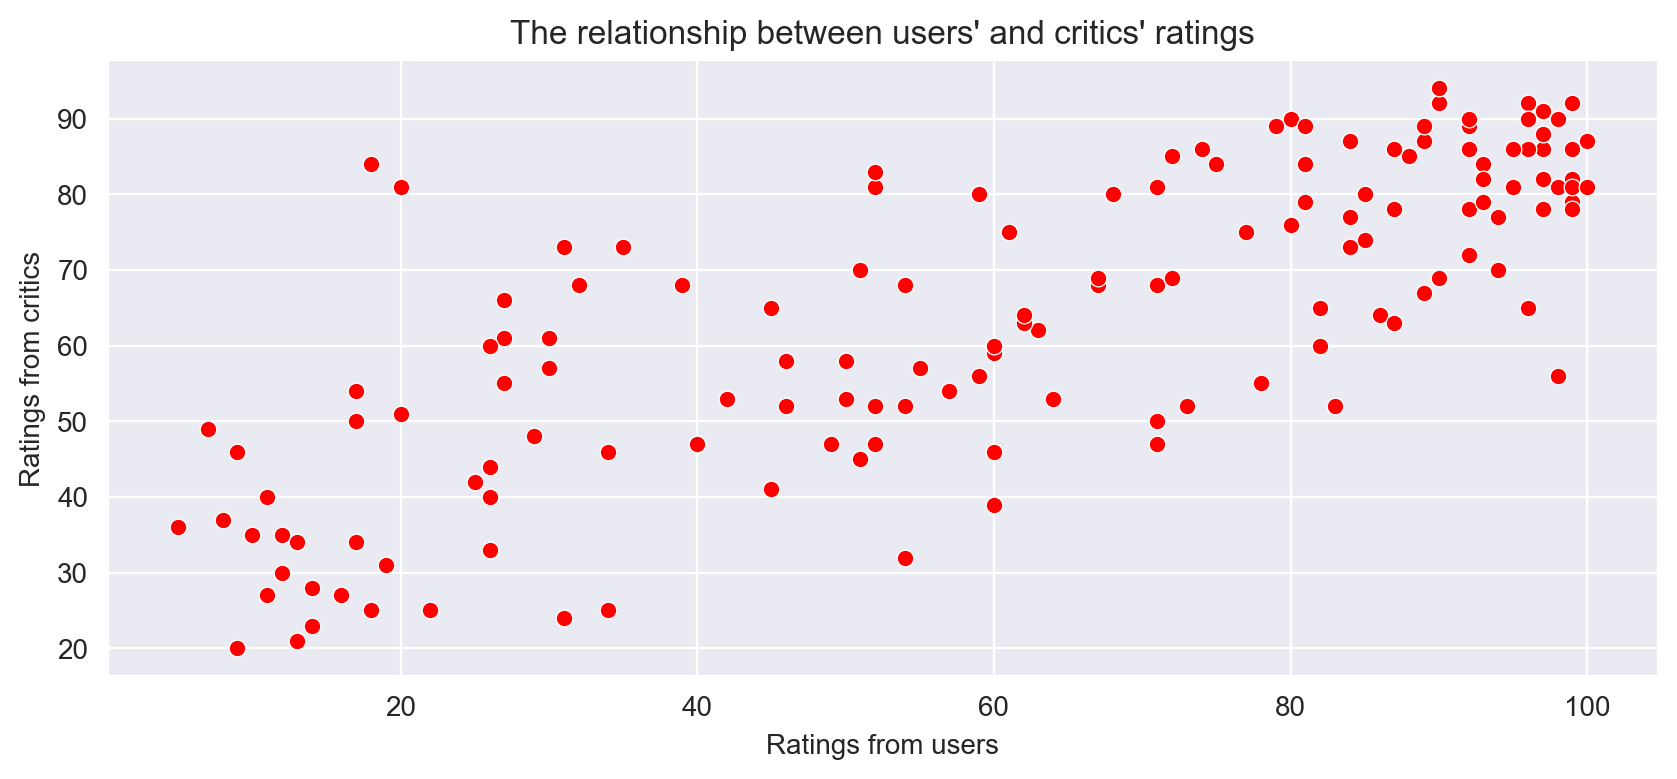

In [319]:
plt.figure(figsize=(10, 4), dpi=200)

sns.scatterplot(data=df2, x="RottenTomatoes", y="RottenTomatoes_User", color="r")

plt.xlabel("Ratings from users")
plt.ylabel("Ratings from critics")
plt.title("The relationship between users' and critics' ratings");

Now let's find the relationship numerically using the following formula:

*RottenTomatoes - RottenTomatoes_User*

Strong deviations in the positive direction will mean that the film is well appreciated by critics, but poorly by users, strong deviations in the negative - on the contrary.


In [320]:
df2["Rotten_Diff"] = df2["RottenTomatoes"] - df2["RottenTomatoes_User"]
print(f"Average deviation value: {df2["Rotten_Diff"].mean()}")

Average deviation value: -3.0273972602739727


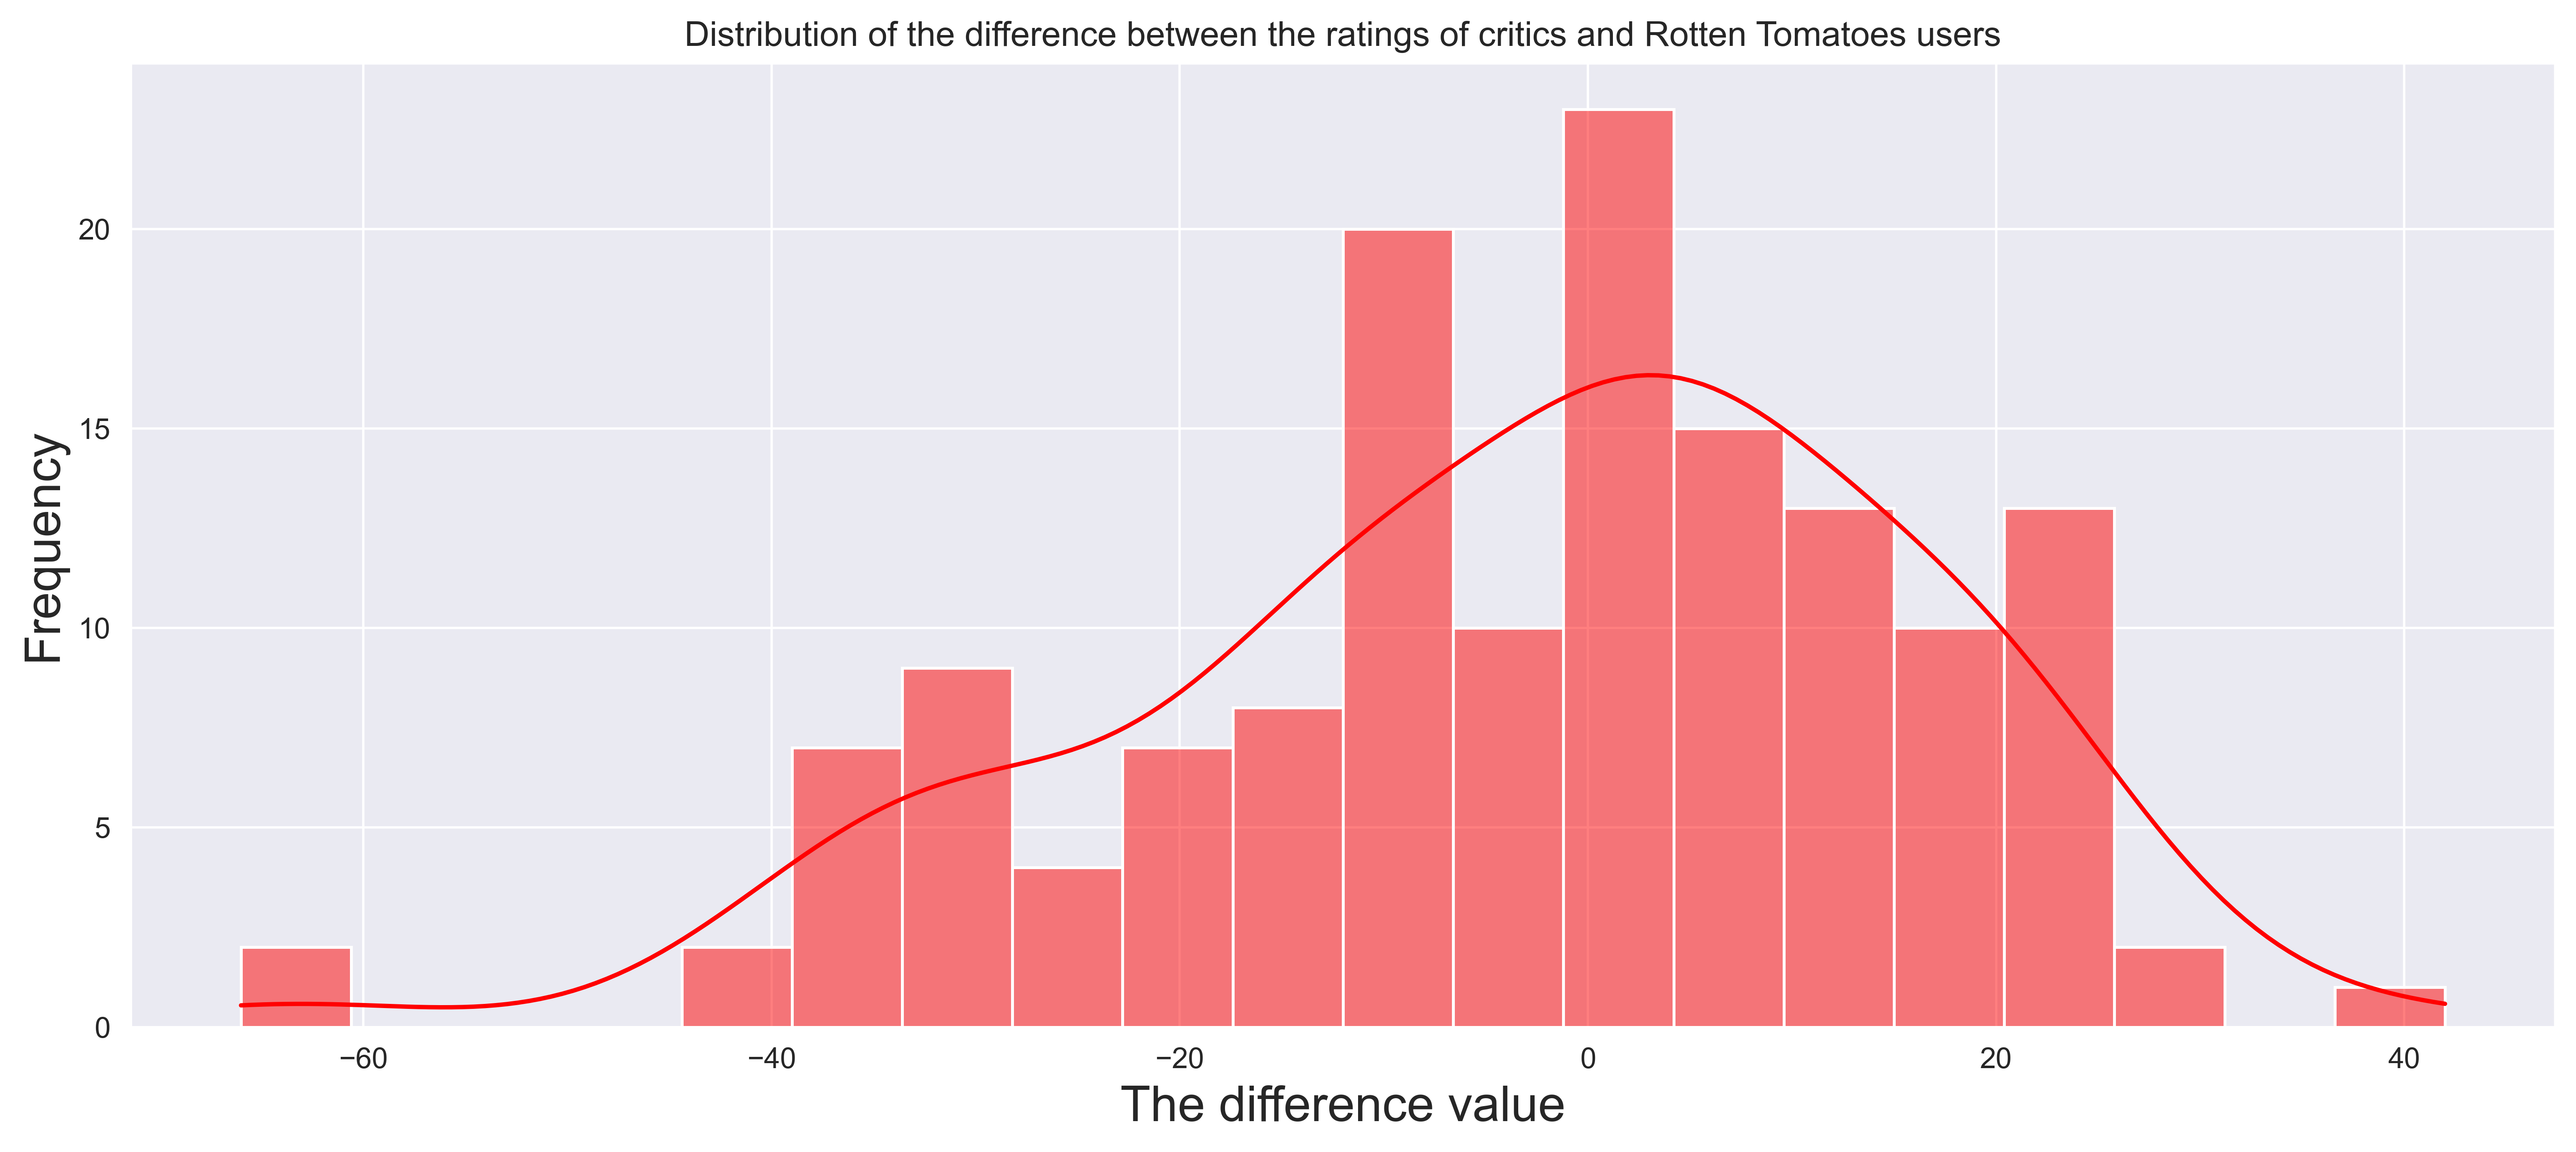

In [321]:
plt.figure(figsize=(15, 6), dpi=500)

sns.histplot(data=df2, x="Rotten_Diff", bins=20, color="r", kde=True)

plt.xlabel("The difference value", size=17)
plt.ylabel("Frequency", size=17)
plt.title("Distribution of the difference between the ratings of critics and Rotten Tomatoes users");

Let's compare this distribution with the normal one using the QQ-plot:

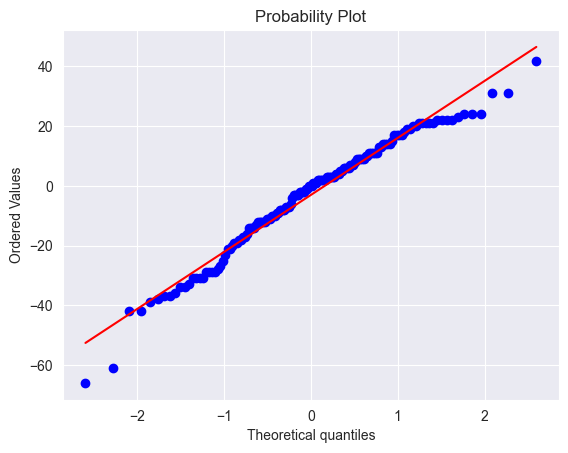

In [322]:
st.probplot(df2["Rotten_Diff"], dist="norm", plot=plt)

plt.show()

Near zero, the distribution is close to normal, but there are noticeable deviations at the ends. This indicates that, on average, the ratings are interchangeable and repeat each other.

#### Metacritic

As with Rotten Tomatoes, there are two sets of data: 
- `Metacritic` - ratings from critics; 
- `Metacritic_User` - ratings from users. 

Let's display the relationship of some ratings from others:

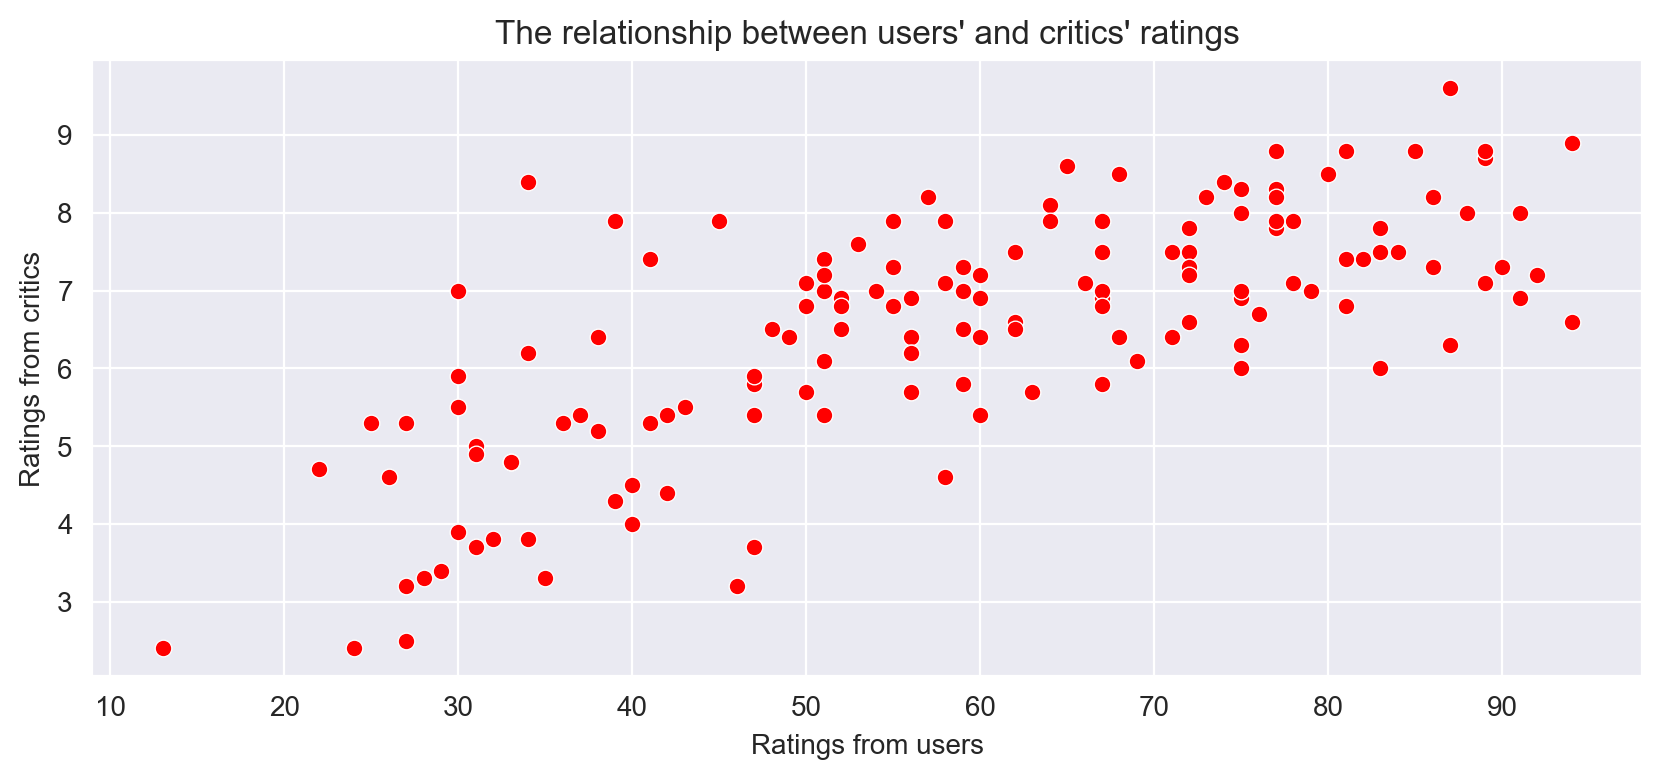

In [323]:
plt.figure(figsize=(10, 4), dpi=200)

sns.scatterplot(data=df2, x="Metacritic", y="Metacritic_User", color="r")

plt.xlabel("Ratings from users")
plt.ylabel("Ratings from critics")
plt.title("The relationship between users' and critics' ratings");

Now let's find the relationship numerically using the following formula:

*Metacritic - Metacritic_User*

Strong deviations in the positive direction will mean that the film is well appreciated by critics, but poorly by users, strong deviations in the negative - on the contrary.

In [324]:
df2["Metacritic_Diff"] = df2["Metacritic"] - df2["Metacritic_User"]
print(f"Average deviation value: {df2["Metacritic_Diff"].mean()}")

Average deviation value: 52.28904109589041


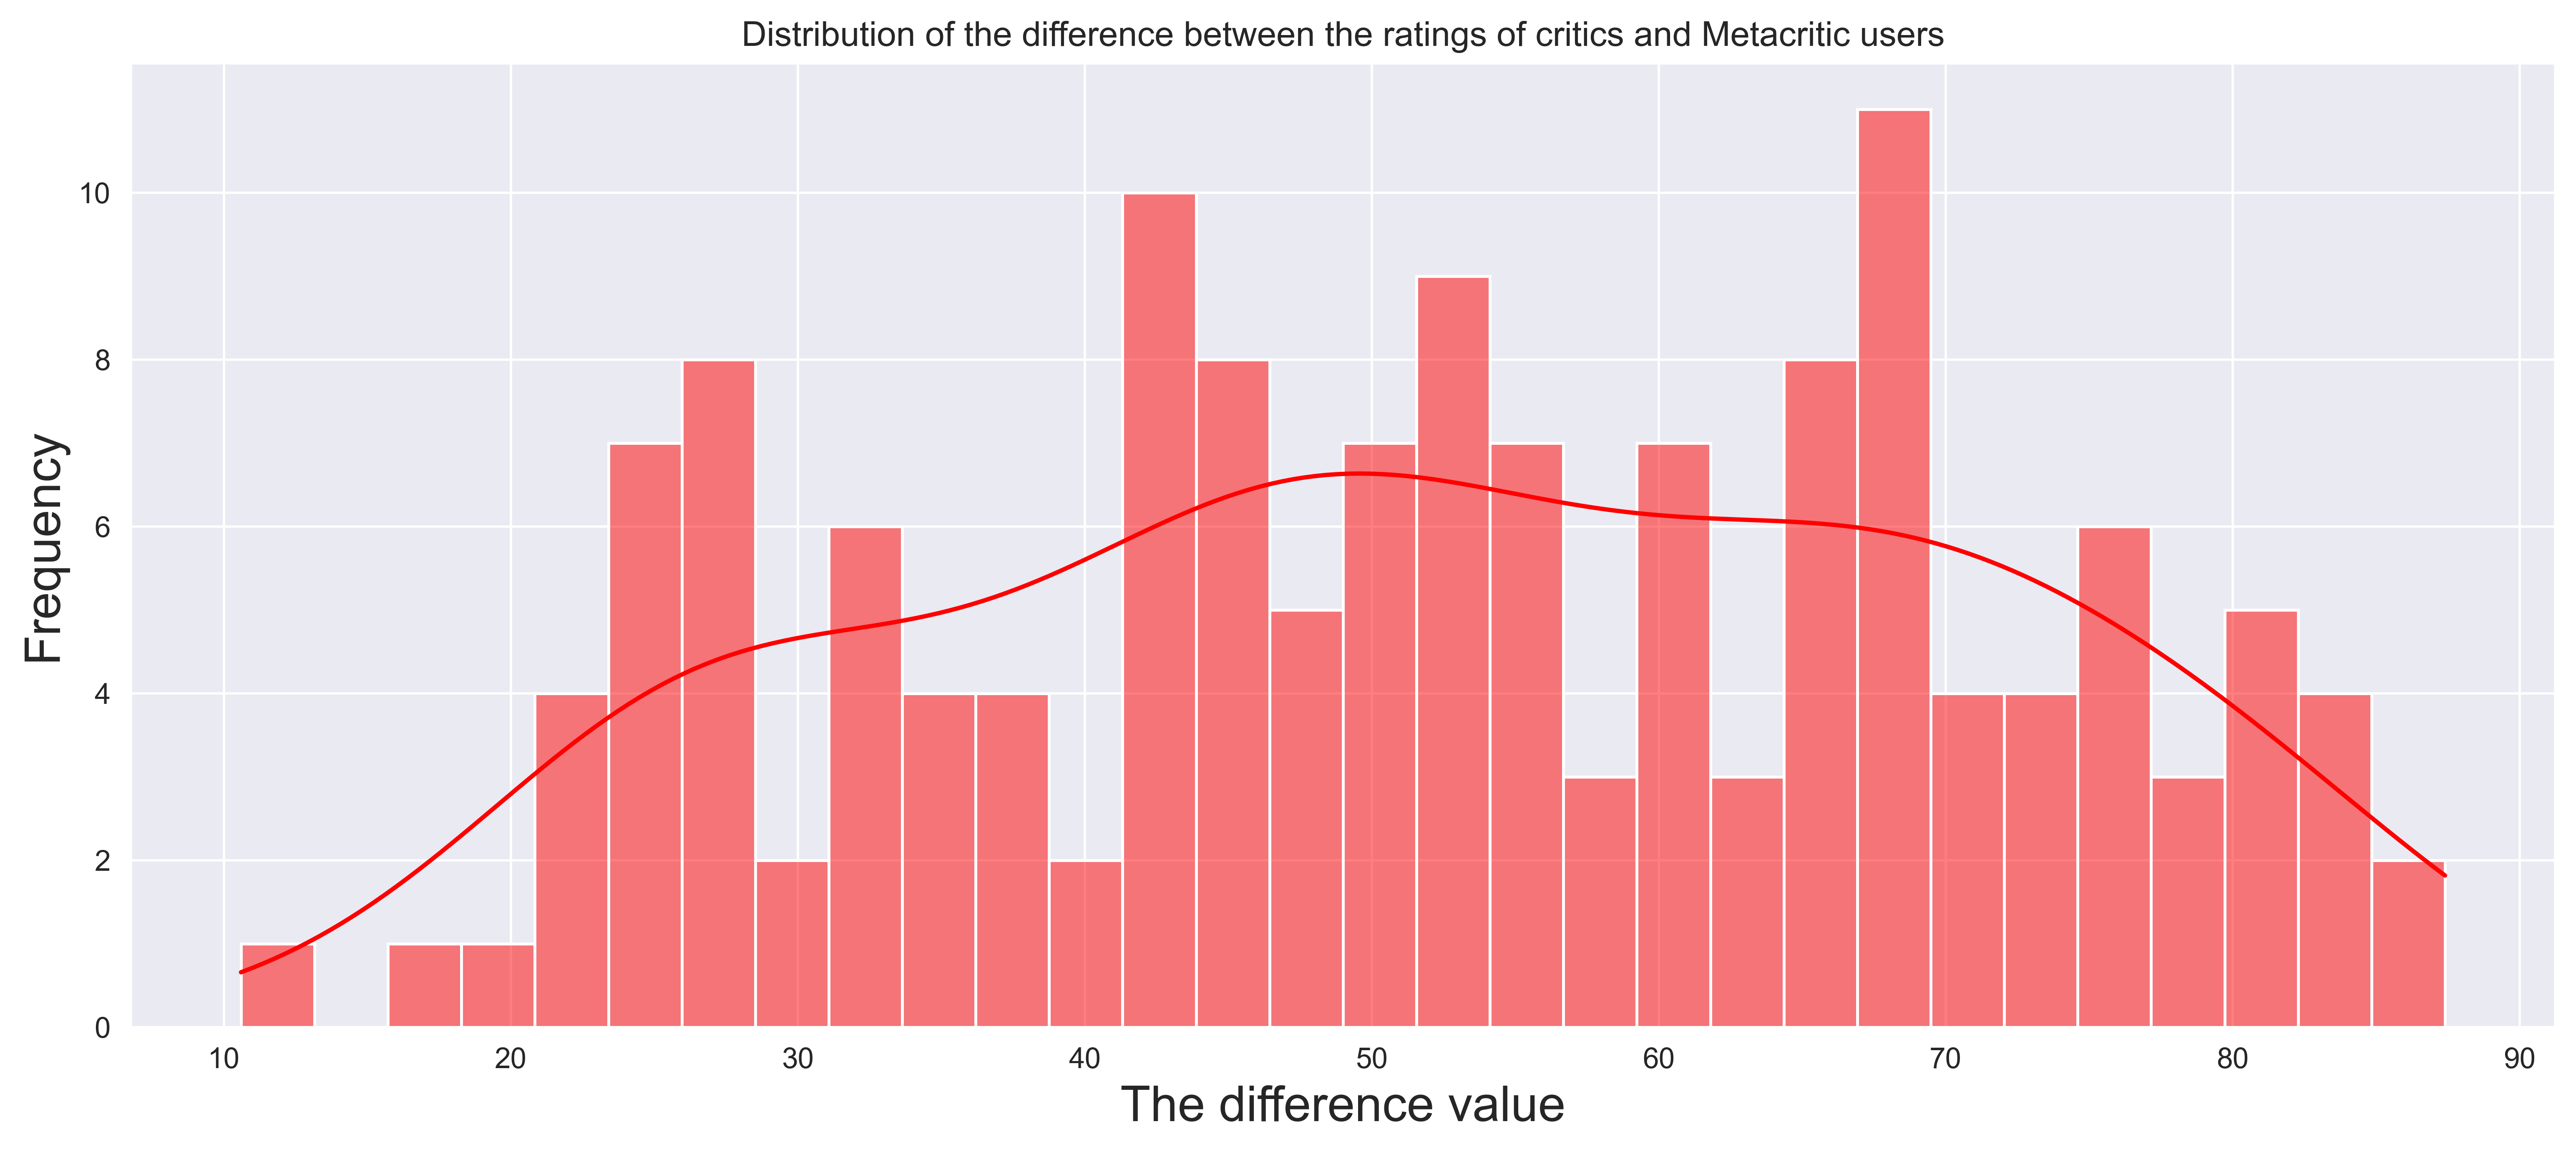

In [325]:
plt.figure(figsize=(15, 6), dpi=500)

sns.histplot(data=df2, x="Metacritic_Diff", bins=30, color="r", kde=True)

plt.xlabel("The difference value", size=17)
plt.ylabel("Frequency", size=17)
plt.title("Distribution of the difference between the ratings of critics and Metacritic users");

Let's compare this distribution with the normal one using the QQ-plot:


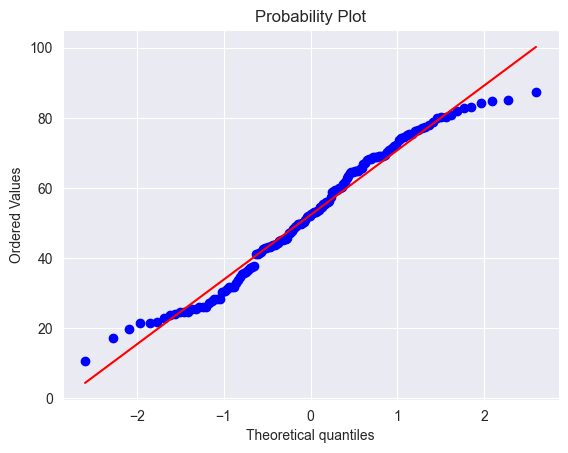

In [326]:
st.probplot(df2["Metacritic_Diff"], dist="norm", plot=plt)

plt.show()

The distribution deviates quite a lot from normal, although it has a similar tendency around zero.

### Comparison of Fandango ratings with ratings of other companies

In [327]:
df3 = pd.merge(df1, df2, how="inner", on="FILM")

#### Data normalisation

It is important to pay attention to the fact that the ratings of different companies are presented in different formats. To do this, we will convert them to the [0, 100] format: 
- Ratings in the format [0, 5] multiplied by 20; 
- Ratings in the format [0, 10] multiplied by 10.

In [328]:
df_norm = df3[["FILM", "STARS", "RATING", "RottenTomatoes", "RottenTomatoes_User", "Metacritic", "Metacritic_User",	"IMDB"]]
df_norm[["STARS", "RATING"]] = (df_norm[["STARS", "RATING"]] * 20).astype(int)
df_norm[["Metacritic_User", "IMDB"]] = (df_norm[["Metacritic_User", "IMDB"]] * 10).astype(int)
df_norm.head()

,FILM,STARS,RATING,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB
0,Fifty Shades of Grey (2015),80,78,25,42,46,32,42
1,Jurassic World (2015),90,90,71,81,59,70,73
2,American Sniper (2015),100,96,72,85,72,66,74
3,Furious 7 (2015),100,96,81,84,67,68,74
4,Inside Out (2015),90,90,98,90,94,89,86


#### Comparison of ratings

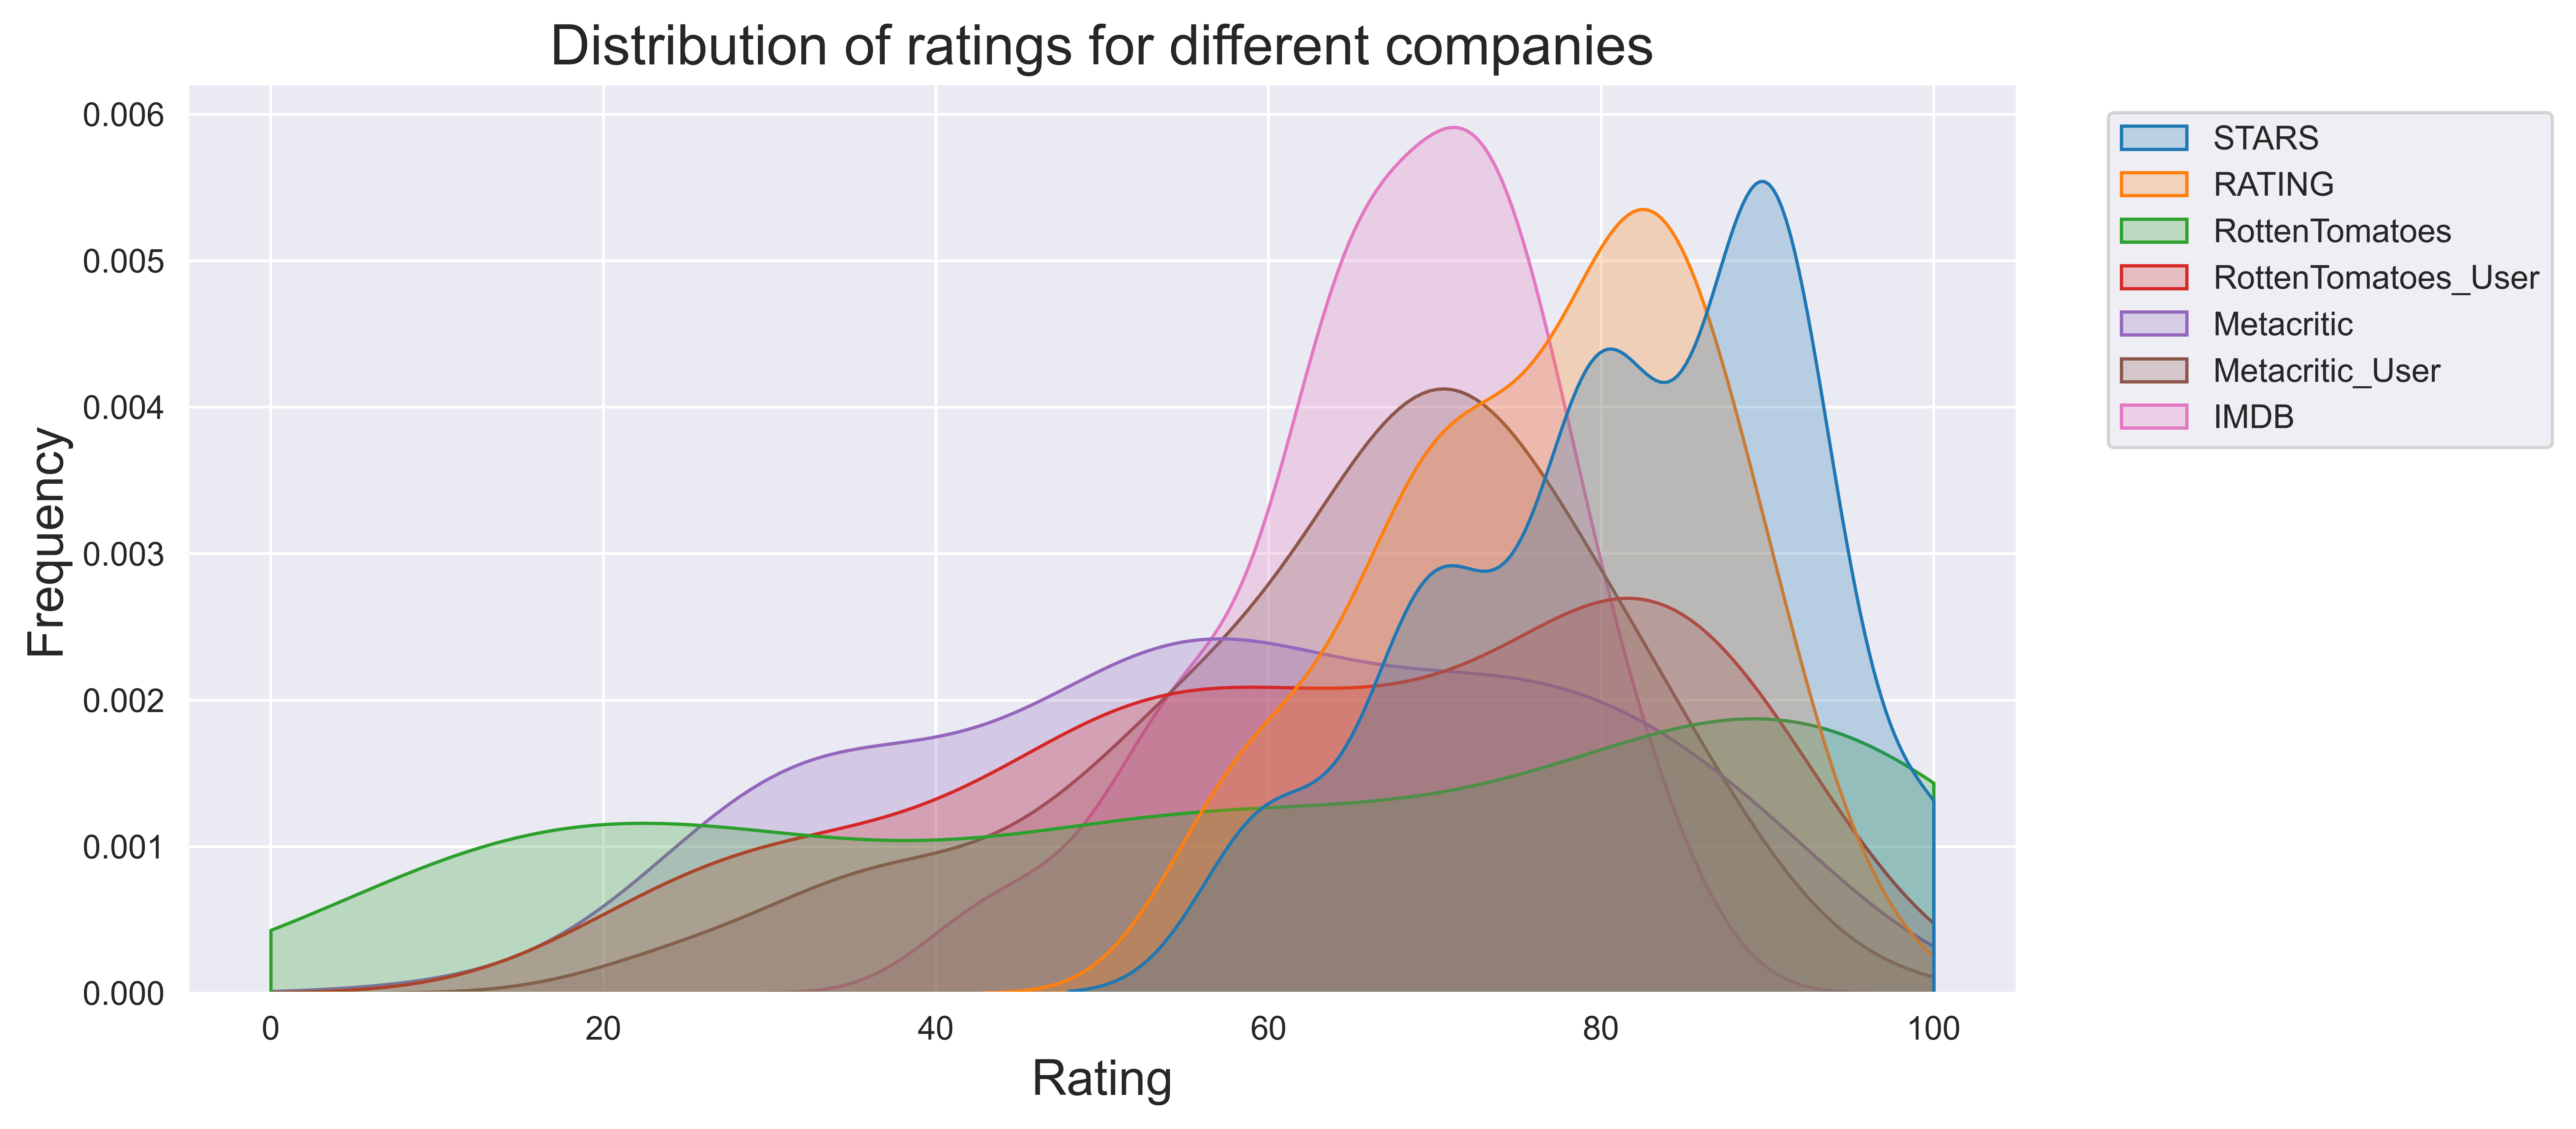

In [329]:
plt.figure(figsize=(10, 5), dpi=700)

ax = sns.kdeplot(data=df_norm, clip=[0, 100], fill=True)

plt.xlabel("Rating", size=15)
plt.ylabel("Frequency", size=15)
plt.title("Distribution of ratings for different companies", size=17)
sns.move_legend(ax, (1.05, 0.6));

The graph clearly shows that the ratings from Fandango are indeed shifted to the right relative to the ratings of other companies, moreover, ratings below 40 are not found at all. For more obvious differences, let's compare the ratings of the most unsuccessful films. Since the rating from Rotten Tomatoes has the most flat distribution, the ranking of films will be based on it.

In [330]:
df_norm.nsmallest(10, "RottenTomatoes")

,FILM,STARS,RATING,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB
49,Paul Blart: Mall Cop 2 (2015),70,70,5,36,13,24,43
84,Hitman: Agent 47 (2015),80,78,7,49,28,33,59
54,Hot Pursuit (2015),80,74,8,37,31,37,49
25,Taken 3 (2015),90,82,9,46,26,46,61
28,Fantastic Four (2015),60,54,9,20,27,25,40
50,The Boy Next Door (2015),80,72,10,35,30,55,46
87,Unfinished Business (2015),70,64,11,27,32,38,54
88,The Loft (2015),80,72,11,40,24,24,63
77,Seventh Son (2015),70,64,12,35,30,39,55
78,Mortdecai (2015),70,64,12,30,27,32,55


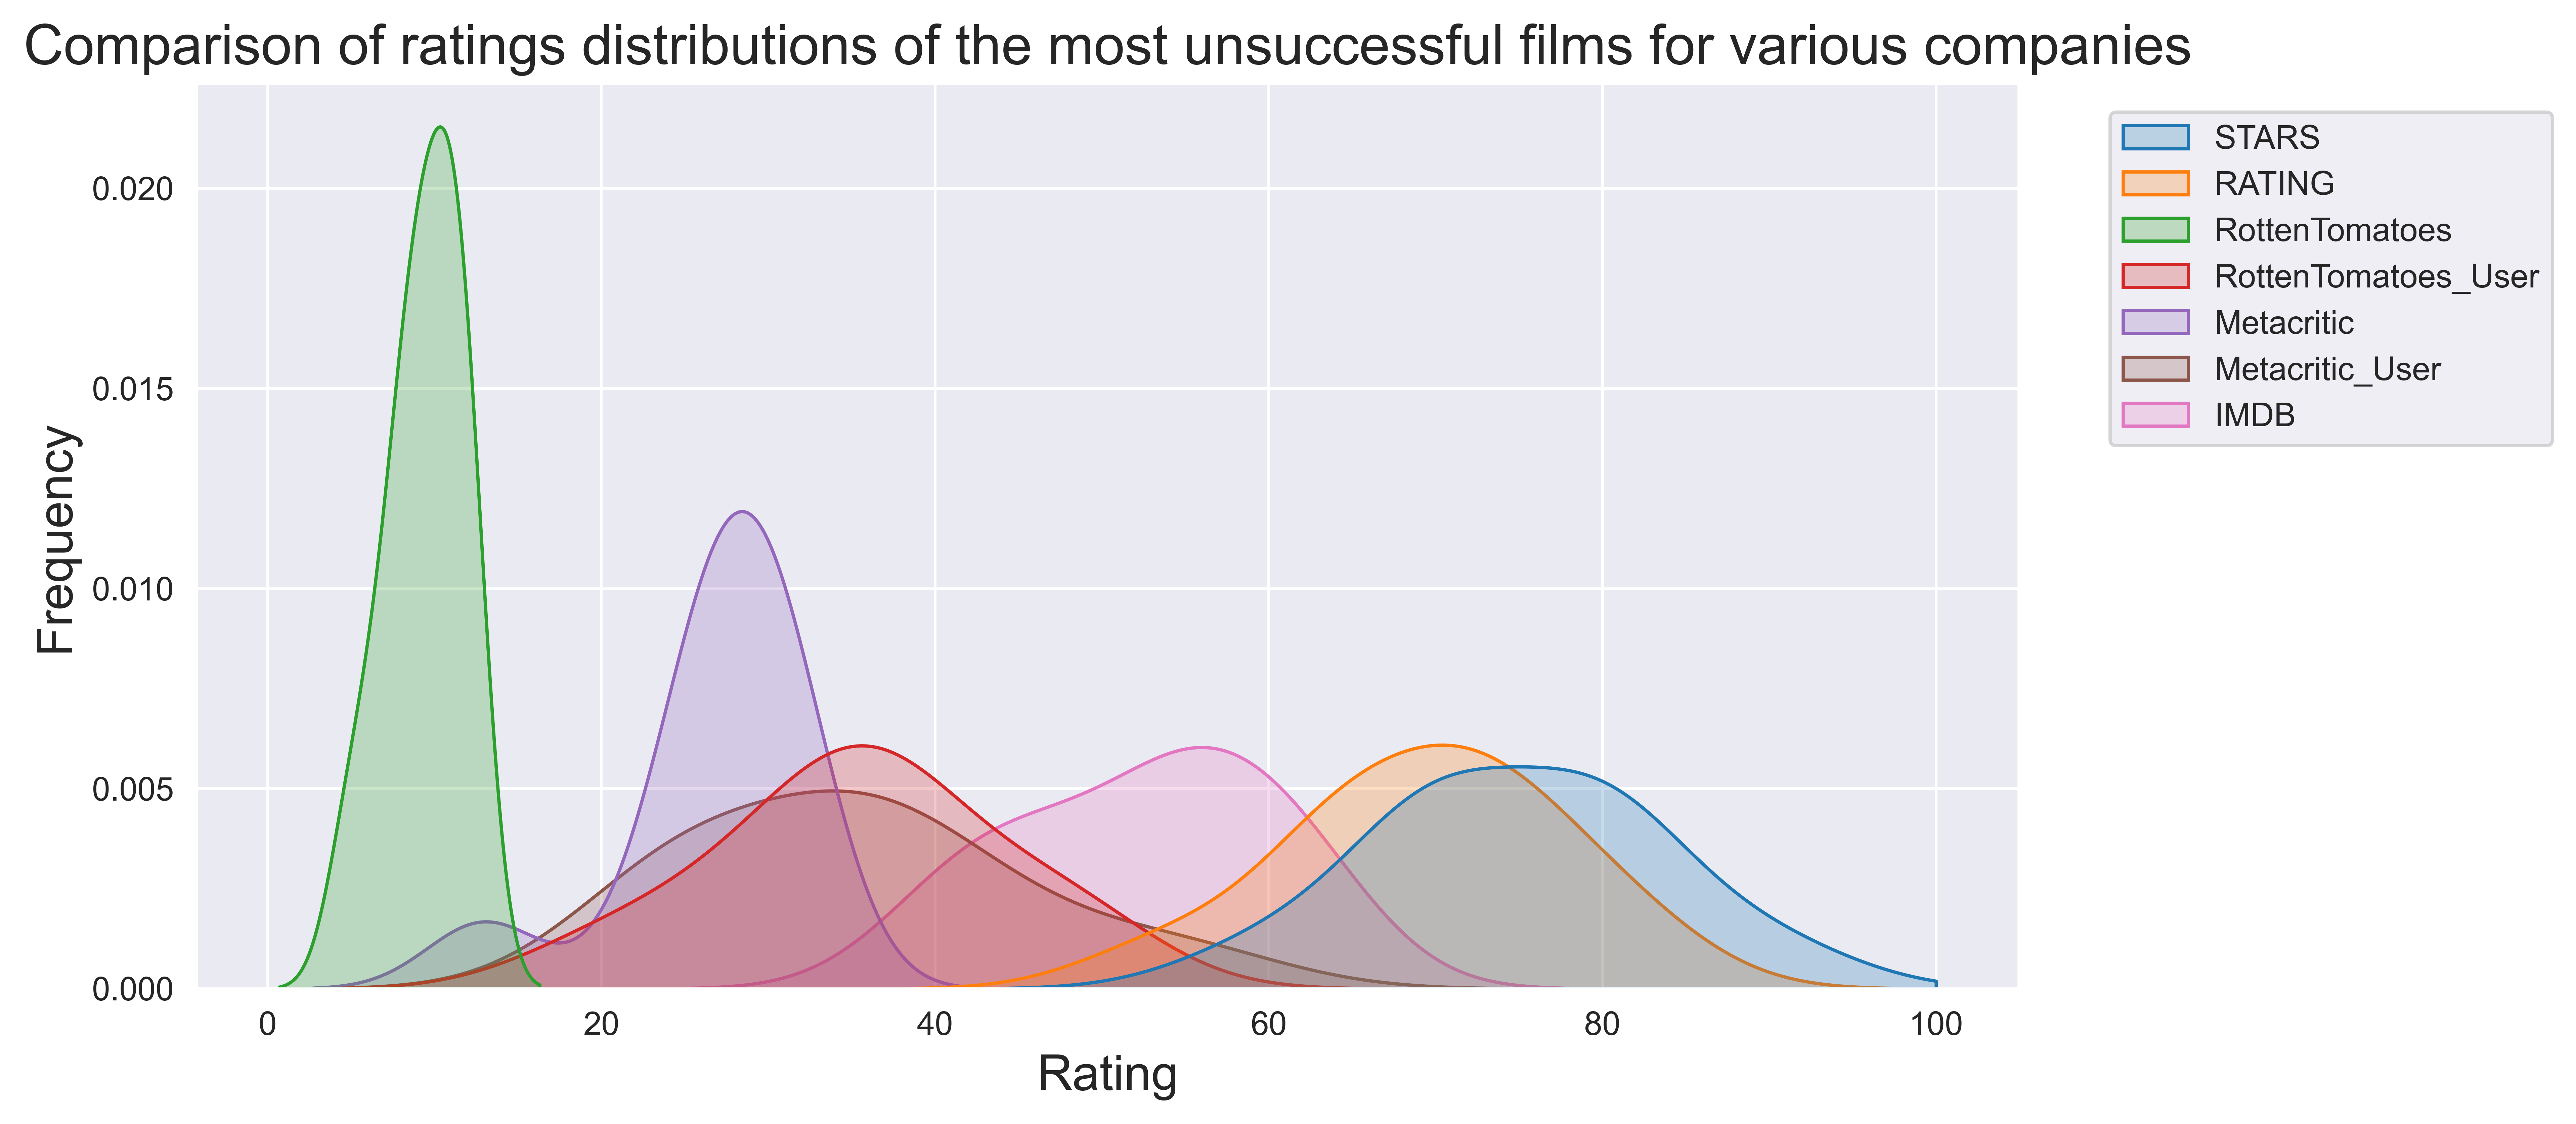

In [331]:
plt.figure(figsize=(10, 5), dpi=700)

ax = sns.kdeplot(data=df_norm.nsmallest(10, "RottenTomatoes"), clip=[0, 100], fill=True)

plt.xlabel("Rating", size=15)
plt.ylabel("Frequency", size=15)
plt.title("Comparison of ratings distributions of the most unsuccessful films for various companies", size=17)
sns.move_legend(ax, (1.05, 0.6));

#### Confirmation of the result based on statistical hypothesis testing methods

In [332]:
df_norm["FANDANGO"] = df_norm[["STARS", "RATING"]].mean(axis=1).round(1)
df_norm["OTHERS"] = df_norm[["RottenTomatoes", "RottenTomatoes_User", "Metacritic", "Metacritic_User", "IMDB"]].mean(axis=1).round(1)
df_compare = df_norm[["FILM", "FANDANGO", "OTHERS"]]
df_compare.head()

,FILM,FANDANGO,OTHERS
0,Fifty Shades of Grey (2015),79.0,37.4
1,Jurassic World (2015),90.0,70.8
2,American Sniper (2015),98.0,73.8
3,Furious 7 (2015),98.0,74.8
4,Inside Out (2015),90.0,91.4


Let's formulate statistical hypotheses: 

**H0** - The averages of the two SP are the same, i.e. there is no overestimation of ratings by Fandango; 

**H1** - The averages of the two SP are not the same, i.e. there is an overestimation of ratings by Fandango.

Statistical significance $\alpha = 0,05$. 

We will use Mann-Whitney U test. 

In [333]:
H0 = "H0: The averages of the two SP are the same, i.e. there is no overestimation of ratings by Fandango"
H1 = "H1: The averages of the two SP are not the same, i.e. there is an overestimation of ratings by Fandango"
ALPHA = 0.05

stat, pv = st.mannwhitneyu(df_compare["FANDANGO"], df_compare["OTHERS"])

if pv > ALPHA:
    print(f"Correct {H0}. P-value: {pv}")
else:
    print(f"Correct {H1}. P-value: {pv}")

Correct H1: The averages of the two SP are not the same, i.e. there is an overestimation of ratings by Fandango. P-value: 1.4032084821775639e-16
